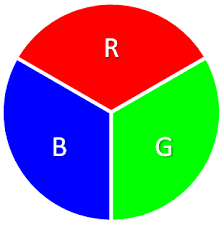

In [20]:
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans

#Load the image into local variabel
image = Image.open("rgb_colours.png")

#Check for the image format to make sure image shape is compatible to analyze pixels
if image.mode != 'RGB':
  image = image.convert('RGB')

#Print original image
image

In [21]:
#Convert the image to a NumPy array
image_array = np.array(image)
#Print the array shape
image_array.shape


(225, 224, 3)

In [22]:
#Pre-processing Data
#Reshape the array to have a flat list of pixels
pixels = image_array.reshape((-1, 3))

#Print the pixel shape
pixels.shape



(50400, 3)

In [23]:
import warnings
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Suppress FutureWarnings related to KMeans
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.cluster._kmeans")

#Initialize variables to track the maximum silhouette score and its corresponding cluster number
best_silhouette_score = -1  # Initialize with a value lower than any possible score
best_k = None

#Min, Max range of cluster numbers
k_values = range(2, 6)
silhouette_scores = []

#Run K-Means clustering for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    cluster_labels = kmeans.fit_predict(pixels)
    silhouette_avg = silhouette_score(pixels, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    #Check if the current silhouette score is the highest
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_k = k

print(f"Optimal Number of Clusters (k): {best_k}")


Optimal Number of Clusters (k): 4


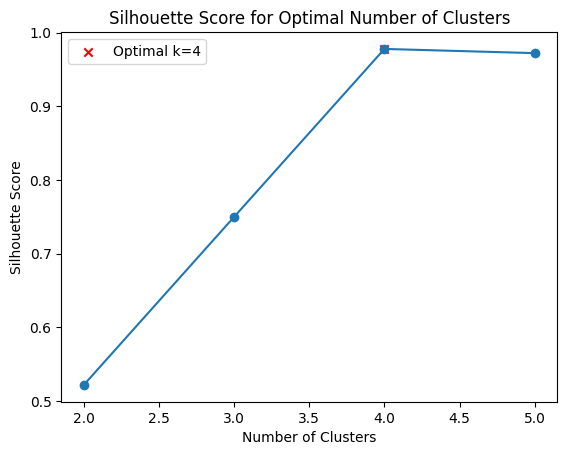

Optimal Number of Clusters (k): 4


In [24]:

import matplotlib.pyplot as plt

#Plot silhouette scores against the number of clusters
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

#Highlight the optimal number of clusters with a marker
plt.scatter(best_k, best_silhouette_score, color='red', marker='x', label=f'Optimal k={best_k}')
plt.legend()

plt.show()

print(f"Optimal Number of Clusters (k): {best_k}")


In [25]:
#K-Means clustering to identify main colors
num_clusters = best_k
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(pixels)

#Get cluster centroids as main colors
main_colors = kmeans.cluster_centers_.astype(int)

#Calculate the proportion of each main color
color_counts = np.bincount(kmeans.labels_)

proportions = color_counts / len(pixels)

#Display main colors and their proportions
for color, proportion in zip(main_colors, proportions):
    print(f"Color: {color}, Proportion: {proportion:.2%}")


Color: [252 252 252], Proportion: 31.18%
Color: [254   1   1], Proportion: 22.99%
Color: [  1 254   1], Proportion: 23.03%
Color: [  1   1 254], Proportion: 22.81%


In [26]:
#Isolating the specified colour for the image to display as a mask
def create_pixel_label(model, input):
  output = model.predict(input.reshape(-1, 3))
  r, c = input.shape[0:2]
  output = output.reshape(r, c, 1)

  output_3d = np.repeat(output, 3, axis=2)

  return output_3d

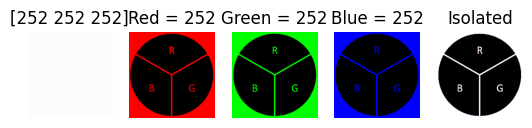

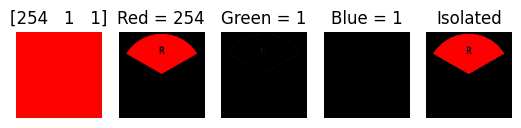

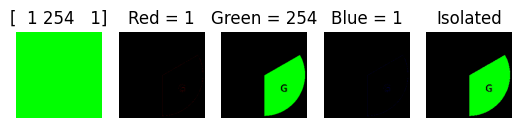

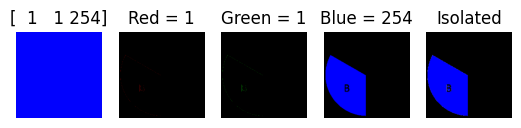

In [27]:

#Ouput Visualized as RGB colours
color_code = ["Red", "Green", "Blue"]
for idx, color in enumerate(main_colors):
  plt.subplot(1, 5, 1)
  plt.title(str(color))
  plt.imshow(color.reshape(1,1,3))
  plt.axis('off')

  output_label = create_pixel_label(kmeans, image_array)
  mask = np.where(output_label == idx, 1, 0)

  #Breaking each main colour into its individual RGB components
  for i in range(3):

    plt.subplot(1, 5, i+2)

    tmp = np.multiply(image_array, mask)
    tmp_zero = np.zeros(image_array.shape)
    tmp_zero[:,:,i] = tmp[:, :, i]/255
    plt.title(color_code[i] + " = " + str(color[i]))
    plt.imshow(tmp_zero)
    plt.axis('off')

  plt.subplot(1, 5, 5)
  plt.title("Isolated")
  plt.imshow(np.multiply(image_array, mask))
  plt.axis('off')

  plt.show()